In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from statannot import add_stat_annotation
from scipy.stats import mannwhitneyu

In [2]:
cutoff = 0
file = '/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22genepromdelta.7/Realdata/response_prediction/BL22LTME/corr/boxplots/try1/BL22LTMEtraining_genepromSM_0.7_ManualbestrefTIL85_result_dupindex_binnedstats.pkladjustedScore_minus_avg_ctporportion_CSxOut.txt_melanoma_noah_Response_encodedontx.txt'
data = pd.read_csv(file, sep='\t', index_col=0, encoding= 'unicode_escape')
df = pd.DataFrame(data)

df

,Eo,Er,M0,M1,M2,MelTumor,Mg,Mono,NK,NaiveCD4,...,cm4,cm8,ed8,em4,em8,iDC,mB,mDC,nB,ResponseEncoded
Mixture,,,,,,,,,,,,,,,,,,,,,
Y-3685-cfDNA,0.032357,0.063379,0.021353,0.021112,0.020410,0.013498,0.094882,0.025599,0.033136,0.014195,...,0.009133,0.010416,0.009667,0.003974,0.014115,0.016695,0.008166,0.022240,0.008042,0
Y-3706-cfDNA,0.035093,0.051375,0.027089,0.027517,0.020161,0.025497,0.077457,0.042489,0.024271,0.014433,...,0.013377,0.016004,0.009995,0.011033,0.000000,0.029068,0.018845,0.010096,0.016827,1
Y-3711-cfDNA,0.044896,0.065578,0.033276,0.036236,0.030105,0.021076,0.091646,0.036078,0.047723,0.026834,...,0.024465,0.027711,0.031715,0.018044,0.015309,0.034699,0.027589,0.043707,0.016831,0
Y-3720-cfDNA,0.044587,0.076446,0.036531,0.031008,0.030384,0.022138,0.082604,0.044928,0.042640,0.030052,...,0.035936,0.022375,0.024957,0.019216,0.010749,0.035526,0.030457,0.023999,0.028469,0
Y-3735-cfDNA,0.025632,0.080788,0.023674,0.017093,0.018094,0.026075,0.081593,0.024215,0.023844,0.014883,...,0.010761,0.011171,0.020240,0.010509,0.005883,0.028605,0.017851,0.012674,0.011841,1
Y-3737-cfDNA,0.054369,0.074951,0.029021,0.032211,0.028377,0.021321,0.072677,0.041461,0.025098,0.020666,...,0.013626,0.009582,0.016184,0.010738,0.008192,0.034272,0.024898,0.020123,0.019644,0
Y-3824-cfDNA,0.049464,0.146055,0.034023,0.030082,0.029495,0.022775,0.145227,0.038816,0.038432,0.022077,...,0.016594,0.023007,0.027715,0.014671,0.007907,0.036367,0.026301,0.018117,0.017093,0
Y-3893-cfDNA,0.033837,0.038364,0.018909,0.018826,0.020171,0.016383,0.053044,0.025021,0.019235,0.014222,...,0.016662,0.006848,0.035271,0.000000,0.004018,0.022134,0.004818,0.009582,0.017954,1
Y-3938-cfDNA,0.042047,0.058920,0.039349,0.043457,0.048319,0.040332,0.064659,0.044006,0.031323,0.030184,...,0.036466,0.037957,0.023565,0.016212,0.018343,0.038906,0.031390,0.027517,0.029236,0


In [3]:
fol = file+'_boxplots' + str(cutoff)
os.mkdir(fol)

In [4]:
conditions = [(df['ResponseEncoded'] <= cutoff), (df['ResponseEncoded'] > cutoff)]
values = ['Response <= ' + str(cutoff), 'Response > ' + str(cutoff)]
df['ResponseEncodedNew'] = np.select(conditions, values)
df

,Eo,Er,M0,M1,M2,MelTumor,Mg,Mono,NK,NaiveCD4,...,cm8,ed8,em4,em8,iDC,mB,mDC,nB,ResponseEncoded,ResponseEncodedNew
Mixture,,,,,,,,,,,,,,,,,,,,,
Y-3685-cfDNA,0.032357,0.063379,0.021353,0.021112,0.020410,0.013498,0.094882,0.025599,0.033136,0.014195,...,0.010416,0.009667,0.003974,0.014115,0.016695,0.008166,0.022240,0.008042,0,Response <= 0
Y-3706-cfDNA,0.035093,0.051375,0.027089,0.027517,0.020161,0.025497,0.077457,0.042489,0.024271,0.014433,...,0.016004,0.009995,0.011033,0.000000,0.029068,0.018845,0.010096,0.016827,1,Response > 0
Y-3711-cfDNA,0.044896,0.065578,0.033276,0.036236,0.030105,0.021076,0.091646,0.036078,0.047723,0.026834,...,0.027711,0.031715,0.018044,0.015309,0.034699,0.027589,0.043707,0.016831,0,Response <= 0
Y-3720-cfDNA,0.044587,0.076446,0.036531,0.031008,0.030384,0.022138,0.082604,0.044928,0.042640,0.030052,...,0.022375,0.024957,0.019216,0.010749,0.035526,0.030457,0.023999,0.028469,0,Response <= 0
Y-3735-cfDNA,0.025632,0.080788,0.023674,0.017093,0.018094,0.026075,0.081593,0.024215,0.023844,0.014883,...,0.011171,0.020240,0.010509,0.005883,0.028605,0.017851,0.012674,0.011841,1,Response > 0
Y-3737-cfDNA,0.054369,0.074951,0.029021,0.032211,0.028377,0.021321,0.072677,0.041461,0.025098,0.020666,...,0.009582,0.016184,0.010738,0.008192,0.034272,0.024898,0.020123,0.019644,0,Response <= 0
Y-3824-cfDNA,0.049464,0.146055,0.034023,0.030082,0.029495,0.022775,0.145227,0.038816,0.038432,0.022077,...,0.023007,0.027715,0.014671,0.007907,0.036367,0.026301,0.018117,0.017093,0,Response <= 0
Y-3893-cfDNA,0.033837,0.038364,0.018909,0.018826,0.020171,0.016383,0.053044,0.025021,0.019235,0.014222,...,0.006848,0.035271,0.000000,0.004018,0.022134,0.004818,0.009582,0.017954,1,Response > 0
Y-3938-cfDNA,0.042047,0.058920,0.039349,0.043457,0.048319,0.040332,0.064659,0.044006,0.031323,0.030184,...,0.037957,0.023565,0.016212,0.018343,0.038906,0.031390,0.027517,0.029236,0,Response <= 0


In [5]:
#df=df.sort_values(by=['ResponseEncoded'])
#df.head()

Response <= 0 v.s. Response > 0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.825e-02 U_stat=1.900e+01
Response <= 0 v.s. Response > 0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.619e-01 U_stat=1.500e+01
Response <= 0 v.s. Response > 0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.825e-02 U_stat=1.900e+01
Response <= 0 v.s. Response > 0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.024e-02 U_stat=2.000e+01
Response <= 0 v.s. Response > 0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.265e-02 U_stat=2.100e+01
Response <= 0 v.s. Response > 0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.000e+01
Response <= 0 v.s. Response > 0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.619e-01 U_stat=1.500e+01
Response <= 0 v.s. Response > 0: Mann-Whitney-Wilcoxon test two-sided with Bonferro

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


Response <= 0 v.s. Response > 0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.106e-01 U_stat=1.800e+01
Response <= 0 v.s. Response > 0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.715e-01 U_stat=1.700e+01


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


Response <= 0 v.s. Response > 0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.265e-02 U_stat=2.100e+01
Response <= 0 v.s. Response > 0: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.545e-01 U_stat=1.600e+01


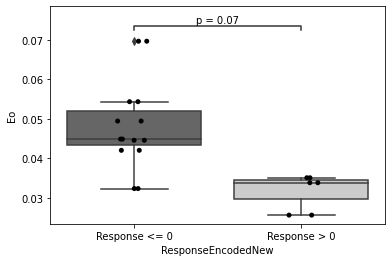

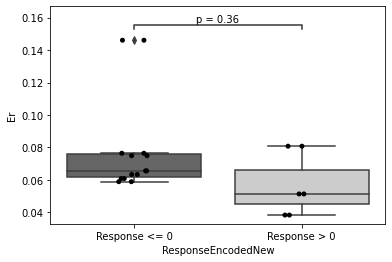

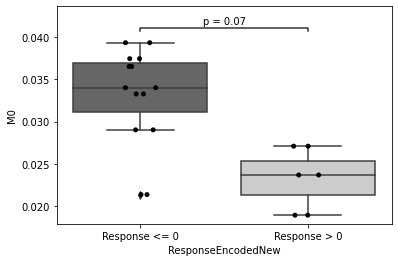

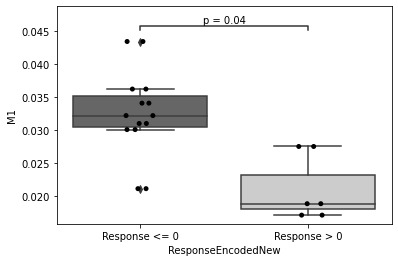

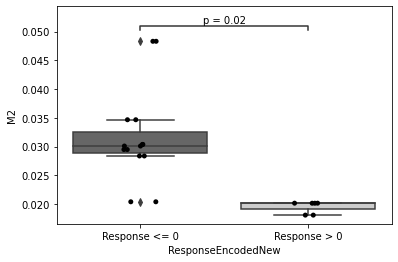

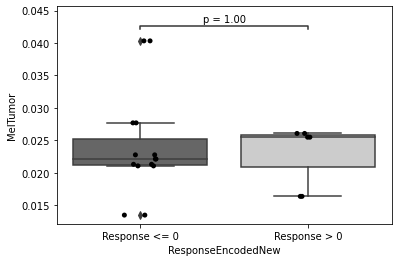

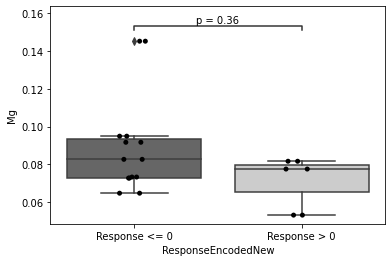

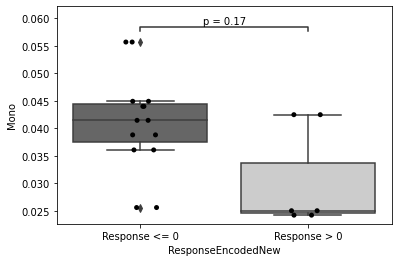

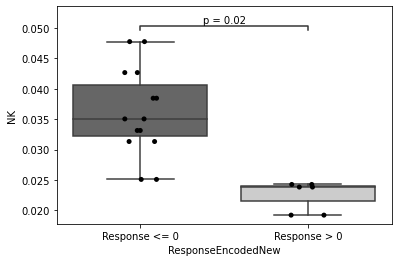

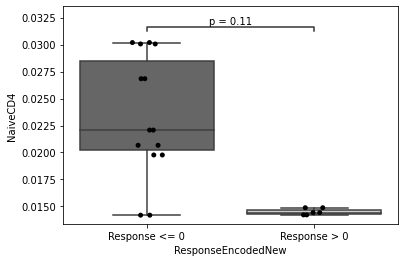

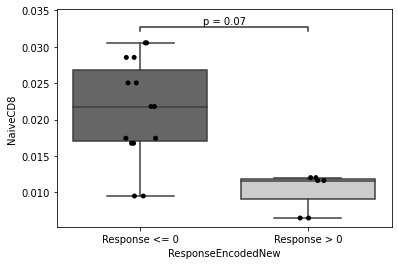

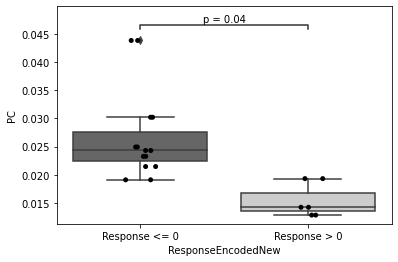

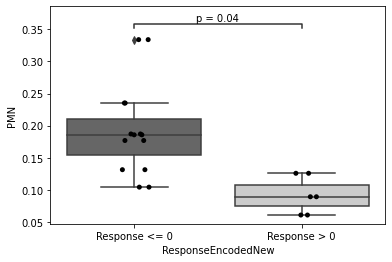

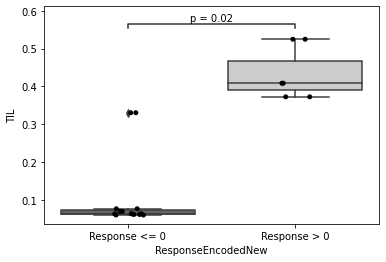

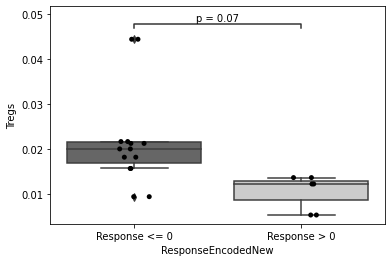

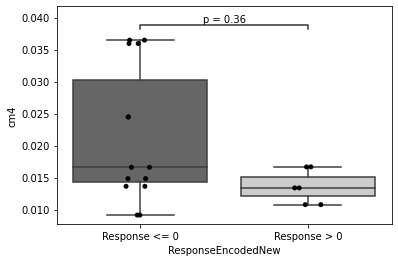

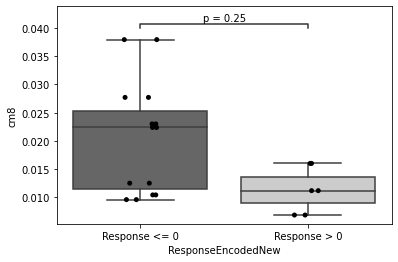

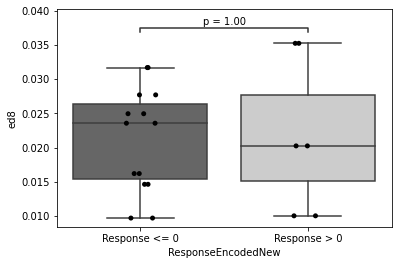

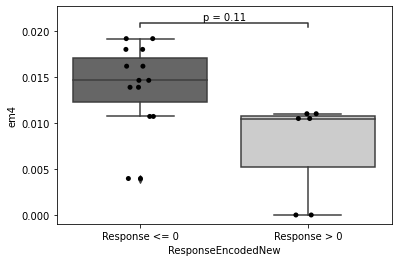

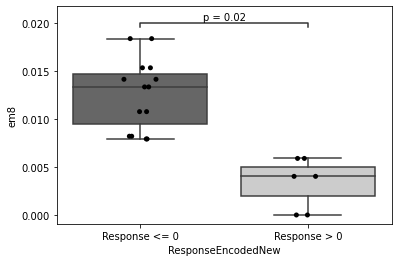

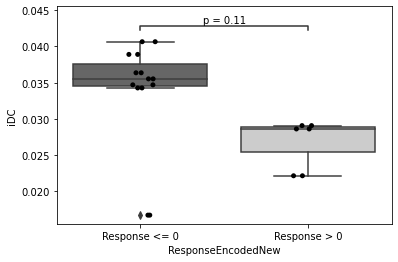

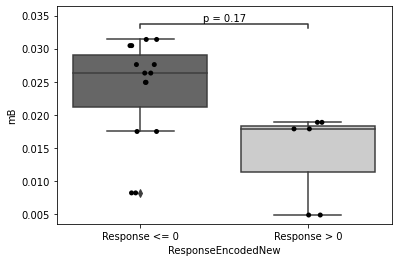

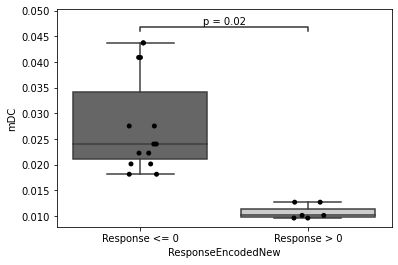

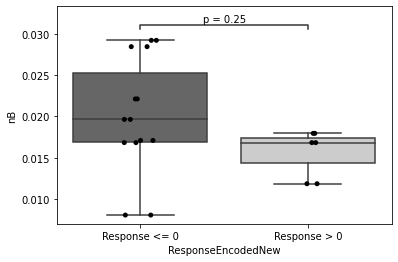

In [6]:
p_vals = {}
for cell in df.columns:
    p_val_list = []
    if cell not in ['ResponseEncoded', 'ResponseEncodedNew']:
        fig, ax = plt.subplots(1, 1)
        sns.boxplot(x='ResponseEncodedNew', y=cell, data=df, ax=ax, palette=[(0.4, 0.4, 0.4), (0.8, 0.8, 0.8)])
        add_stat_annotation(ax, data=df, x='ResponseEncodedNew', y=cell,
                    box_pairs=[(values[0], values[1])],
                    test='Mann-Whitney', text_format='simple', loc='inside', verbose=2)
        for i, toxicity in enumerate(values):
            y = np.array(df[df['ResponseEncodedNew'] == toxicity][cell])
            p_val_list.append(y)
            x = np.random.normal(i, 0.04, size=len(y))
            #plt.scatter(x, y, c='k')
            
            #################################irf################
            sns.stripplot(x = 'ResponseEncodedNew',
              y = cell,color='black',
              data = df)
        p_vals[cell] = [mannwhitneyu(p_val_list[0], p_val_list[1], alternative='two-sided')[1]]
        plt.savefig(fol + '/' + cell + '.pdf', bbox_inches='tight')

In [7]:
df_pvals = pd.DataFrame.from_dict(p_vals, orient='index', columns=['p-value (MWU)'])
df_pvals.to_csv(file + '_pvals.txt', sep='\t')